In [1]:
import sys
sys.path.append('../')

In [2]:
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from utils.eval import score
from utils.models import CentroidSMOTE
from utils.models import KNNModel
from imblearn.over_sampling import SMOTE

# Reading, Preprocessing and EDA

In [3]:
Train_path = "../datasets/CreditCard/UCI_Credit_Card.csv"
train_df = pd.read_csv(Train_path)
print("Done")

Done


Dataset has no missing or categorical values.

In [4]:
print(train_df.isnull().sum().sum(), train_df.isna().sum().sum())

0 0


In [5]:
list_dtype = [train_df[i].dtype for i in train_df.columns]
print(dict((i, list_dtype.count(i)) for i in list_dtype))

{dtype('int64'): 12, dtype('float64'): 13}


In [6]:
label_encoder = LabelEncoder()
pred_var = train_df.columns[-1]
train_df[pred_var] = label_encoder.fit_transform(train_df[pred_var])    

In [7]:
print(train_df[pred_var].value_counts())

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64


In [8]:
scl = StandardScaler()
scl.fit(train_df)
scl.transform(train_df)
train_df, test_df = train_test_split(train_df, train_size = 0.9, random_state = 42) 
y_train = train_df[pred_var]
y_test = test_df[pred_var]
X_train = train_df.drop([pred_var], axis = 1)
X_test = test_df.drop([pred_var], axis = 1)

In [9]:
pipeline = Pipeline([
    ('classifier', KNeighborsClassifier(metric='euclidean'))
])

parameters = {
    'classifier__n_neighbors' : [3, 5, 7, 9, 11],
}

In [10]:
y_test = y_test.to_numpy()
y_train = y_train.to_numpy()
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.768333
Error Rate: 0.2316666666666667
Precision: 0.606142
Recall: 0.541374
F1-score: 0.535052
Selectivity: 0.541374
Balanced Accuracy: 0.541374
Geometric Mean: 0.541374


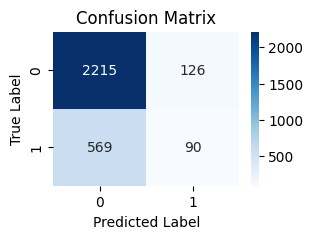

In [11]:
clf = GridSearchCV(pipeline, param_grid = parameters, cv = 5, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train, y_train)
score(X_test, y_test, best_clf)

Resampled dataset shape Counter({0: 21023, 1: 21023})
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.606667
Error Rate: 0.3933333333333333
Precision: 0.548553
Recall: 0.567529
F1-score: 0.536959
Selectivity: 0.567529
Balanced Accuracy: 0.567529
Geometric Mean: 0.567529


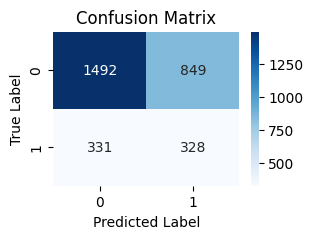

Resampled dataset shape Counter({0: 21023, 1: 21023})
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.604000
Error Rate: 0.396
Precision: 0.549026
Recall: 0.568546
F1-score: 0.536341
Selectivity: 0.568546
Balanced Accuracy: 0.568546
Geometric Mean: 0.568546


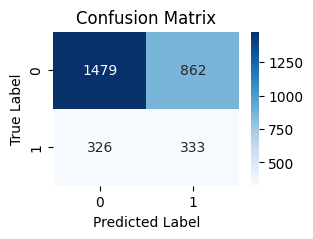

Resampled dataset shape Counter({0: 21023, 1: 21023})
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.611667
Error Rate: 0.3883333333333333
Precision: 0.553256
Recall: 0.574004
F1-score: 0.542426
Selectivity: 0.574004
Balanced Accuracy: 0.574004
Geometric Mean: 0.574004


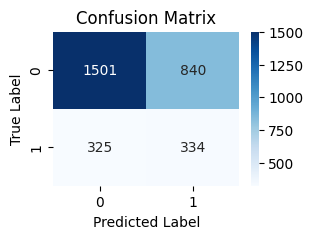

Resampled dataset shape Counter({0: 21023, 1: 21023})
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.604667
Error Rate: 0.3953333333333333
Precision: 0.546819
Recall: 0.565157
F1-score: 0.534887
Selectivity: 0.565157
Balanced Accuracy: 0.565157
Geometric Mean: 0.565157


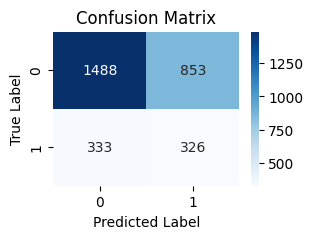

Resampled dataset shape Counter({0: 21023, 1: 21023})
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.609667
Error Rate: 0.3903333333333333
Precision: 0.551157
Recall: 0.571087
F1-score: 0.540070
Selectivity: 0.571087
Balanced Accuracy: 0.571087
Geometric Mean: 0.571087


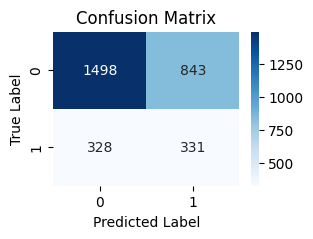

In [12]:
sm_list = []
from collections import Counter
for i in [3, 5, 7, 9, 11]:
    sm_list.append(SMOTE(random_state=42, k_neighbors=i))
for sm in sm_list:
    X_new, y_new = sm.fit_resample(X_train, y_train)
    print('Resampled dataset shape %s' % Counter(y_new))
    pipeline = Pipeline([
        ('classifier', KNeighborsClassifier())
    ])

    parameters = {
        'classifier__n_neighbors' : [3, 5, 7, 9, 11],
    }

    clf = GridSearchCV(pipeline, param_grid = parameters, cv = 5, verbose=True, n_jobs=-1)
    best_clf = clf.fit(X_new, y_new)
    score(X_test, y_test, best_clf)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.609667
Error Rate: 0.3903333333333333
Precision: 0.552600
Recall: 0.573267
F1-score: 0.541187
Selectivity: 0.573267
Balanced Accuracy: 0.573267
Geometric Mean: 0.573267


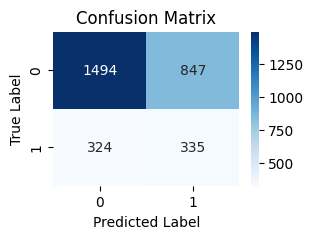

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.616667
Error Rate: 0.3833333333333333
Precision: 0.559039
Recall: 0.582114
F1-score: 0.548731
Selectivity: 0.582114
Balanced Accuracy: 0.582114
Geometric Mean: 0.582114


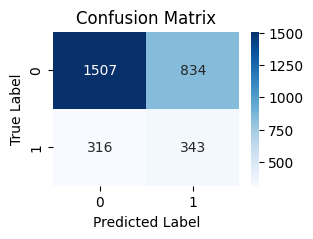

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.610667
Error Rate: 0.3893333333333333
Precision: 0.555980
Recall: 0.578269
F1-score: 0.544147
Selectivity: 0.578269
Balanced Accuracy: 0.578269
Geometric Mean: 0.578269


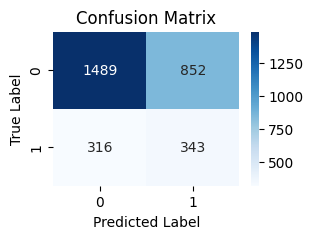

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.613000
Error Rate: 0.387
Precision: 0.553578
Recall: 0.574313
F1-score: 0.543157
Selectivity: 0.574313
Balanced Accuracy: 0.574313
Geometric Mean: 0.574313


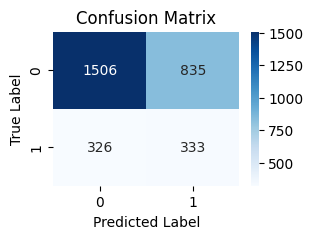

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.623000
Error Rate: 0.377
Precision: 0.559838
Recall: 0.582356
F1-score: 0.551617
Selectivity: 0.582356
Balanced Accuracy: 0.582356
Geometric Mean: 0.582356


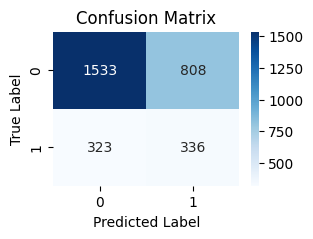

In [13]:
csm_list = []
for (i,j) in [(5,3), (7,3), (9,3), (7,5), (9,7)]:
    csm_list.append(CentroidSMOTE(k_neighbors=i, m_vertices=j))

for csm in csm_list:
    X_new, y_new = csm.fit_resample(X_train, y_train)
    pipeline = Pipeline([
        ('classifier', KNeighborsClassifier())
    ])

    parameters = {
        'classifier__n_neighbors' : [3, 5, 7, 9, 11],
    }

    clf = GridSearchCV(pipeline, param_grid = parameters, cv = 5, verbose=True, n_jobs=-1)
    best_clf = clf.fit(X_new, y_new)
    score(X_test, y_test, best_clf)